In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df_identity = pd.read_csv('../data/raw/train_identity.csv')
df_transaction = pd.read_csv('../data/raw/train_transaction.csv')

In [3]:
df_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [4]:
df_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Fraud Distribution

In [5]:
df_transaction.isFraud.unique()

array([0, 1])

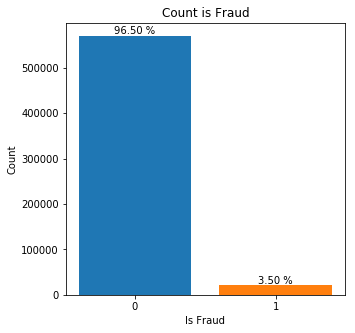

In [6]:
x = df_transaction.isFraud.unique()
y = df_transaction.groupby(df_transaction.isFraud).count()["TransactionID"]

fig, ax = plt.subplots(figsize=(5,5))

ax.bar(x, y, color=['tab:blue', 'tab:orange']);
ax.set_xticks(range(0,2));
ax.set_xticklabels(x);
ax.set_title("Count is Fraud");
ax.set_xlabel("Is Fraud");
ax.set_ylabel("Count");

rects = ax.patches

# Make some labels.
labels = [(y[0] / y.sum() * 100), (y[1] / y.sum() * 100)]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, "{:.2f} %".format(label),
            ha='center', va='bottom')

## Transaction Amounts

In [7]:
# Transaction amounts
df_transaction.TransactionAmt.describe()

count    590540.000000
mean        135.027176
std         239.162522
min           0.251000
25%          43.321000
50%          68.769000
75%         125.000000
max       31937.391000
Name: TransactionAmt, dtype: float64

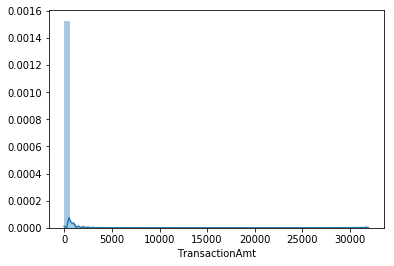

In [8]:
sns.distplot(df_transaction['TransactionAmt']);

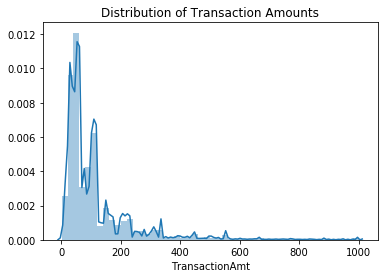

In [9]:
plot = sns.distplot(df_transaction[df_transaction['TransactionAmt'] <= 1000]['TransactionAmt'])
plot.set_title("Distribution of Transaction Amounts");

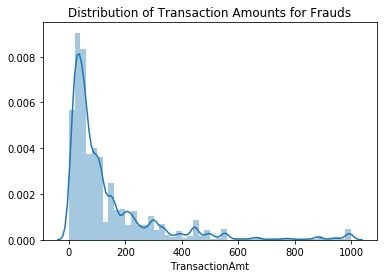

In [10]:
plot = sns.distplot(df_transaction[(df_transaction['TransactionAmt'] <= 1000) & (df_transaction.isFraud == 1)]['TransactionAmt'])
plot.set_title("Distribution of Transaction Amounts for Frauds");

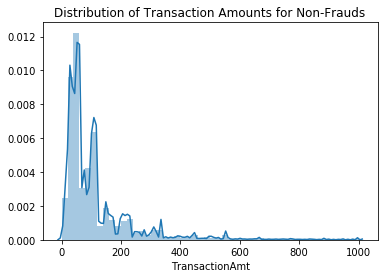

In [11]:
plot = sns.distplot(df_transaction[(df_transaction['TransactionAmt'] <= 1000) & (df_transaction.isFraud == 0)]['TransactionAmt'])
plot.set_title("Distribution of Transaction Amounts for Non-Frauds");

## ProductCD

-> Categorical

In [12]:
df_transaction.ProductCD.unique()

array(['W', 'H', 'C', 'S', 'R'], dtype=object)

In [13]:
df_transaction.groupby(df_transaction.ProductCD).count()["TransactionID"]

ProductCD
C     68519
H     33024
R     37699
S     11628
W    439670
Name: TransactionID, dtype: int64

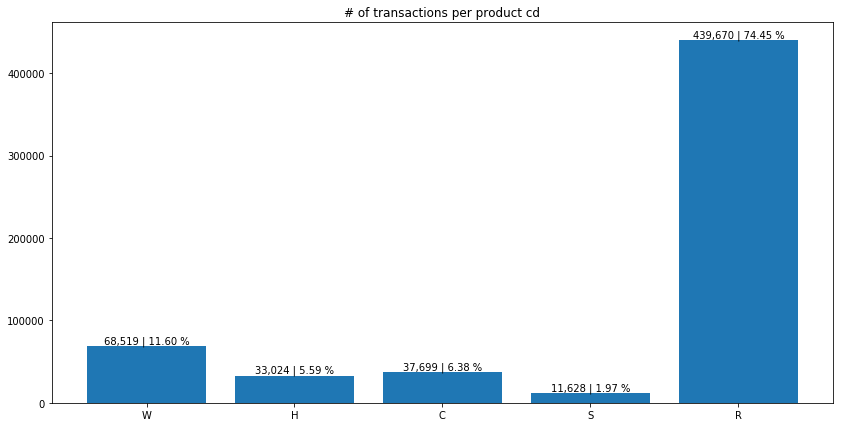

In [14]:
fig, ax = plt.subplots(figsize=(14,7))

x = df_transaction.ProductCD.unique()
y = df_transaction.groupby(df_transaction.ProductCD).count()["TransactionID"]

ax.bar(x, y);
ax.set_title("# of transactions per product cd");

rects = ax.patches

# Make some labels.
labels = y

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, "{:,} | {:.2f} %".format(label, (label / y.sum() * 100)),
            ha='center', va='bottom')

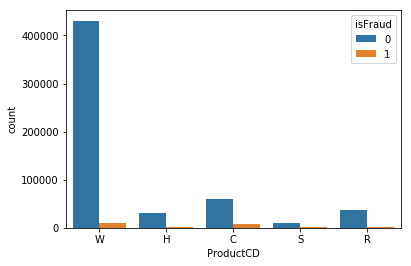

In [15]:
g1 = sns.countplot(x='ProductCD', hue='isFraud', data=df_transaction)

In [16]:
tmp = pd.crosstab(df_transaction['ProductCD'], df_transaction['isFraud'], normalize='index') * 100
tmp 

isFraud,0,1
ProductCD,,
C,88.312731,11.687269
H,95.233769,4.766231
R,96.217406,3.782594
S,94.100447,5.899553
W,97.960061,2.039939


## Card Features

-> Categorical

In [17]:
df_cards = df_transaction.loc[:, 'card1':'card6']

In [18]:
df_cards.head()

,card1,card2,card3,card4,card5,card6
0,13926,NaN,150.0,discover,142.0,credit
1,2755,404.0,150.0,mastercard,102.0,credit
2,4663,490.0,150.0,visa,166.0,debit
3,18132,567.0,150.0,mastercard,117.0,debit
4,4497,514.0,150.0,mastercard,102.0,credit


In [19]:
df_cards.describe()

,card1,card2,card3,card5
count,590540.000000,581607.000000,588975.000000,586281.000000
mean,9898.734658,362.555488,153.194925,199.278897
std,4901.170153,157.793246,11.336444,41.244453
min,1000.000000,100.000000,100.000000,100.000000
25%,6019.000000,214.000000,150.000000,166.000000
50%,9678.000000,361.000000,150.000000,226.000000
75%,14184.000000,512.000000,150.000000,226.000000
max,18396.000000,600.000000,231.000000,237.000000


In [20]:
df_cards.isna().sum()

card1       0
card2    8933
card3    1565
card4    1577
card5    4259
card6    1571
dtype: int64

In [21]:
for col in df_cards.columns:
    print("{} nunique: {}".format(col, df_cards[col].nunique()))

card1 nunique: 13553
card2 nunique: 500
card3 nunique: 114
card4 nunique: 4
card5 nunique: 119
card6 nunique: 4


In [22]:
df_cards.dtypes

card1      int64
card2    float64
card3    float64
card4     object
card5    float64
card6     object
dtype: object

In [23]:
df_cards.head(10)

,card1,card2,card3,card4,card5,card6
0,13926,NaN,150.0,discover,142.0,credit
1,2755,404.0,150.0,mastercard,102.0,credit
2,4663,490.0,150.0,visa,166.0,debit
3,18132,567.0,150.0,mastercard,117.0,debit
4,4497,514.0,150.0,mastercard,102.0,credit
5,5937,555.0,150.0,visa,226.0,debit
6,12308,360.0,150.0,visa,166.0,debit
7,12695,490.0,150.0,visa,226.0,debit
8,2803,100.0,150.0,visa,226.0,debit
9,17399,111.0,150.0,mastercard,224.0,debit


__1, 2, 5 seem to be numerical values__


In [24]:
df_cards_numerical = df_cards.loc[:,["card1", "card2", "card3", "card5"]]

In [25]:
df_cards_numerical.describe()

,card1,card2,card3,card5
count,590540.000000,581607.000000,588975.000000,586281.000000
mean,9898.734658,362.555488,153.194925,199.278897
std,4901.170153,157.793246,11.336444,41.244453
min,1000.000000,100.000000,100.000000,100.000000
25%,6019.000000,214.000000,150.000000,166.000000
50%,9678.000000,361.000000,150.000000,226.000000
75%,14184.000000,512.000000,150.000000,226.000000
max,18396.000000,600.000000,231.000000,237.000000


In [26]:
df_cards_numerical.card3.unique()

array([150., 117., 185., 143., 144., 163., 146., 191., 162., 119., 147.,
       100., 135., 137., 138., 102., 213., 106., 214., 148., 210., 203.,
       194., 141., 225.,  nan, 188., 193., 208., 133., 223., 134., 153.,
       131., 200., 149., 116., 222., 220., 197., 129., 206., 195., 204.,
       127., 142., 111., 159., 118., 229., 217., 212., 227., 166., 189.,
       120., 171., 190., 105., 130., 170., 180., 177., 132., 109., 198.,
       121., 183., 215., 156., 207., 186., 167., 152., 199., 219., 202.,
       126., 182., 123., 107., 221., 124., 231., 157., 136., 128., 168.,
       101., 108., 125., 211., 164., 160., 161., 179., 155., 169., 205.,
       209., 226., 174., 176., 181., 224., 122., 201., 175., 139., 172.,
       114., 228., 184., 151., 173.])

In [27]:
df_cards_numerical.card2.isna().sum()

8933

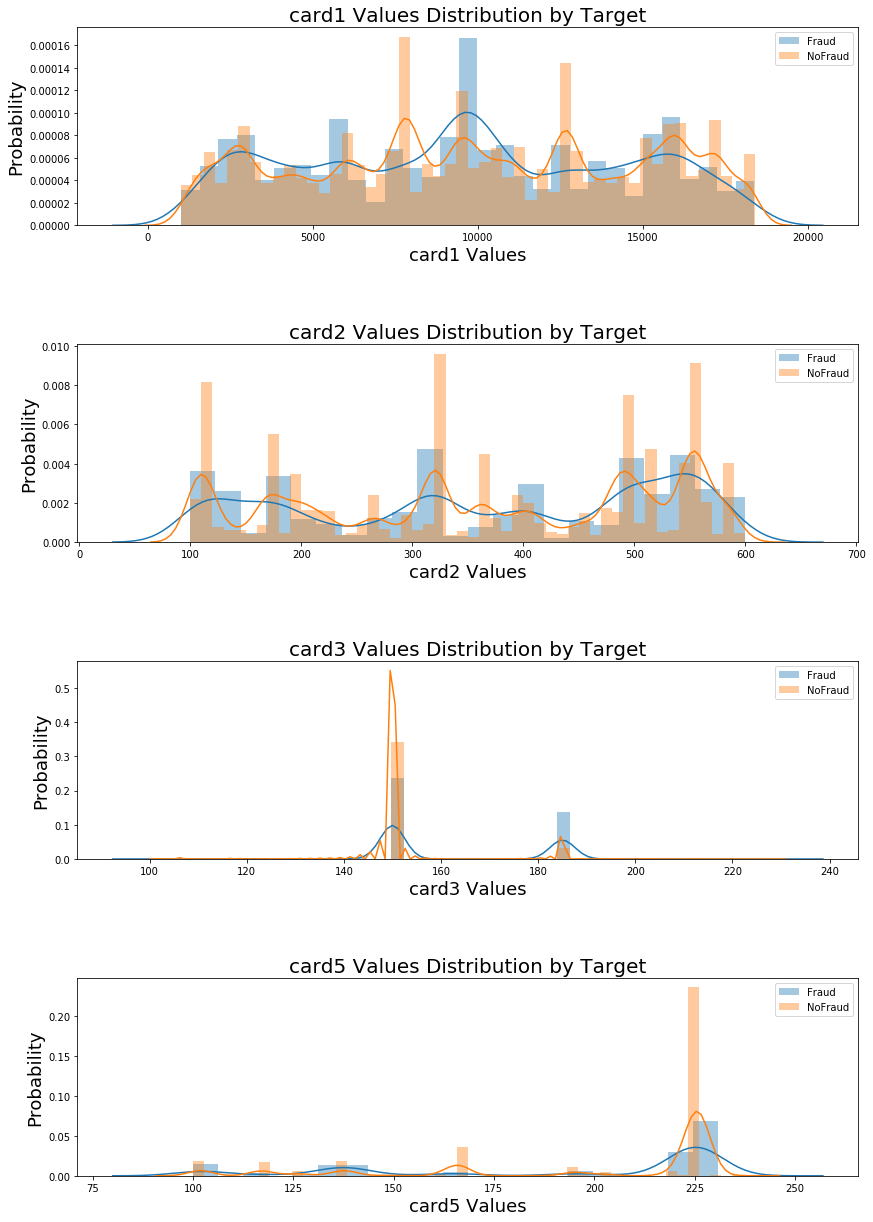

In [28]:
plt.figure(figsize=(14,22))
plt.tight_layout();

for i, col in enumerate(df_cards_numerical.columns, start=1):
    grid = "41" + str(i)
    plt.subplot(int(grid))
    g = sns.distplot(df_transaction[df_transaction['isFraud'] == 1][col].dropna(), label='Fraud')
    g = sns.distplot(df_transaction[df_transaction['isFraud'] == 0][col].dropna(), label='NoFraud')
    g.legend()
    g.set_title("{} Values Distribution by Target".format(col), fontsize=20)
    g.set_xlabel("{} Values".format(col), fontsize=18)
    g.set_ylabel("Probability", fontsize=18)
    
plt.subplots_adjust(hspace = 0.6, top = 0.85)

In [29]:
df_transaction.groupby(df_transaction.card4).count()["TransactionID"]

card4
american express      8328
discover              6651
mastercard          189217
visa                384767
Name: TransactionID, dtype: int64

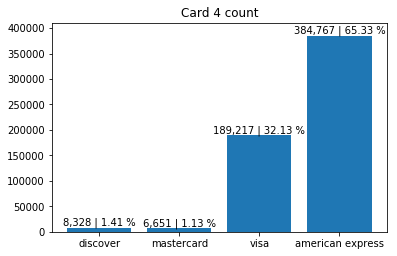

In [30]:
# Card 4
fig, ax = plt.subplots()

x = df_transaction.card4.dropna().unique()
y = df_transaction.groupby("card4").count()["TransactionID"]

ax.bar(x, y);


rects = ax.patches;

# Make some labels.
labels = y

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 3, "{:,} | {:.2f} %".format(label, (label / y.sum() * 100)),
            ha='center', va='bottom')
    
ax.set_title("Card 4 count");
ax.set_ylim(top=410000)

plt.subplots_adjust(hspace = 0.6, top = 0.85)

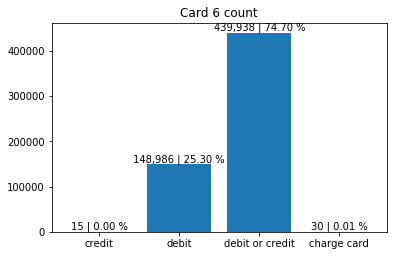

In [31]:
# Card 6
fig, ax = plt.subplots()

x = df_transaction.card6.dropna().unique()
y = df_transaction.groupby("card6").count()["TransactionID"]

ax.bar(x, y);


rects = ax.patches;

# Make some labels.
labels = y

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, "{:,} | {:.2f} %".format(label, (label / y.sum() * 100)),
            ha='center', va='bottom')
    
ax.set_title("Card 6 count");
#ax.set_ylim(top=500000);

plt.subplots_adjust(hspace = 0.6, top = 0.85)

In [32]:
df_transaction.card6.sum()

TypeError: can only concatenate str (not "int") to str

In [ ]:
g = sns.countplot(x='card6', data=df_transaction)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center",fontsize=14) 